In [1]:
import numpy as np
import cv2
import pytesseract
from matplotlib import pyplot as plt
%matplotlib inline

print cv2.__version__
print cv2.__file__

3.1.0
/usr/local/lib/python2.7/dist-packages/cv2.so


In [2]:
#load the image to an np array
img = cv2.imread('../data/sample_images/Screenshot_20160701-201003.png')
#opencv loads to BGR by default, but matplotlib uses RGB, so convert:
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

<type 'numpy.ndarray'>
(1280, 720, 3)


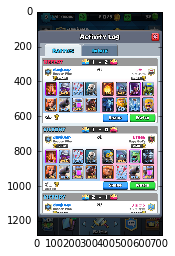

In [3]:
print type(img)
print img.shape
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

350.174713135 -1 4850431 (178.2882537841797, 412.5658874511719) 0.0555255115032 2.42024517059


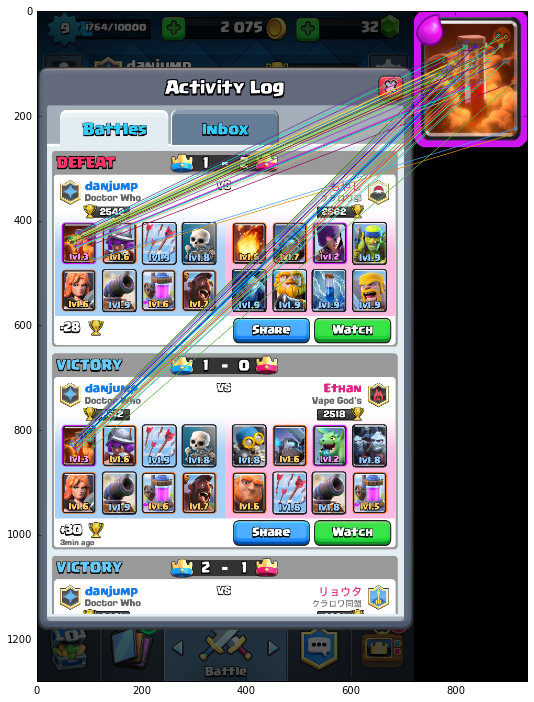

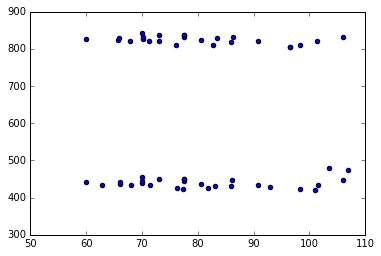

In [21]:
img1 = img          # queryImage
img2 = cv2.imread('../data/card_icons/PoisonCard.png') # trainImage

# Initiate SIFT detector
#sift = cv2.SIFT()
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

keypt = kp1[225]
print keypt.angle, keypt.class_id, keypt.octave, keypt.pt, keypt.response, keypt.size


# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
matchpt_x = []
matchpt_y = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        x, y = kp1[m.queryIdx].pt
        matchpt_x.append(x)
        matchpt_y.append(y)
        good.append([m])
        
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

fig = plt.figure(figsize=(20,12))
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)),plt.show()
plt.scatter(matchpt_x, matchpt_y)


In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10

img1 = img          # queryImage
img2 = cv2.imread('../data/card_icons/MusketeerCard.png') # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

error: /home/danielj/opencv/modules/python/src2/cv2.cpp:163: error: (-215) The data should normally be NULL! in function allocate


In [5]:
import Image 
testimg = Image.open('../data/sample_images/Screenshot_20160701-201003.png')
print type(testimg)

<class 'PIL.PngImagePlugin.PngImageFile'>


In [6]:
 print pytesseract.image_to_string(Image.open('../data/sample_images/Screenshot_20160701-201003.png'), boxes=True) 

A 245 1120 271 1146 0
c 272 1121 289 1141 0
f 291 1121 311 1145 0
i 313 1121 320 1147 0
v 322 1121 342 1140 0
i 345 1121 352 1147 0
f 354 1121 373 1145 0
v 375 1121 396 1141 0
L 408 1121 426 1145 0
o 428 1121 449 1141 0
g 451 1115 471 1142 0
d 48 915 80 956 0
d 92 937 105 953 0
a 107 937 119 950 0
u 122 937 136 949 0
j 134 934 143 954 0
u 145 937 158 949 0
M 160 937 177 950 0
p 180 934 192 950 0
_ 81 918 83 920 0
D 92 916 102 929 0
n 104 916 113 925 0
c 114 916 123 925 0
b 124 916 133 928 0
n 135 916 144 925 0
r 145 916 154 925 0
W 160 916 176 928 0
h 178 916 187 929 0
n 189 916 198 925 0
V 94 901 96 908 0
S 89 883 105 909 0
E 105 883 128 909 0
E 128 884 151 905 0
R 151 884 174 905 0
~ 200 795 203 875 0
~ 126 784 667 787 0
~ 666 722 669 875 0
V 38 594 56 613 0
I 58 594 64 613 0
C 66 594 81 614 0
T 83 594 100 613 0
O 102 593 122 614 0
R 124 594 143 614 0
Y 144 594 162 614 0
@ 48 528 80 569 0
d 92 551 105 567 0
a 107 551 119 564 0
u 122 551 136 563 0
j 134 548 143 568 0
u 145 551 158 563